# Outlier Detection

# 1 - Graphical Methods

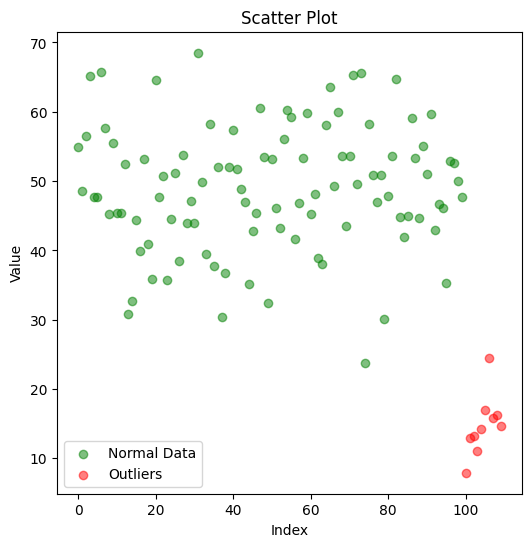

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data with outliers
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.random.normal(loc=15, scale=5, size=10)

# Combine normal data with outliers
data = np.concatenate((normal_data, outliers))
# Create index ranges for plotting
range_1 = range(len(normal_data))
range_2 = range(len(normal_data), len(data))
# Combine normal data with outliers
ranges = np.concatenate((range_1, range_2))
Z = np.array([data, ranges])

# Visualize data using a scatter plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(range_1, normal_data, color="green", alpha=.5, label='Normal Data')
ax.scatter(range_2, outliers, color="red", alpha=.5, label='Outliers')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Scatter Plot')
plt.legend()
plt.show()

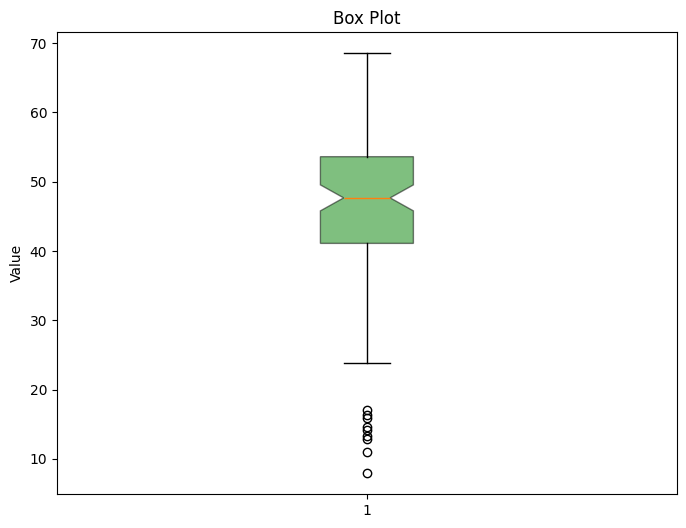

In [5]:
# Visualize data using a box plot
fig, ax = plt.subplots(figsize=(8, 6))
b_plot = ax.boxplot(data, vert=True, patch_artist=True, notch=True)
ax.set_ylabel('Value')
ax.set_title('Box Plot')
# Color the box
for box in b_plot['boxes']:
    box.set_facecolor("green")
    box.set_alpha(.5)

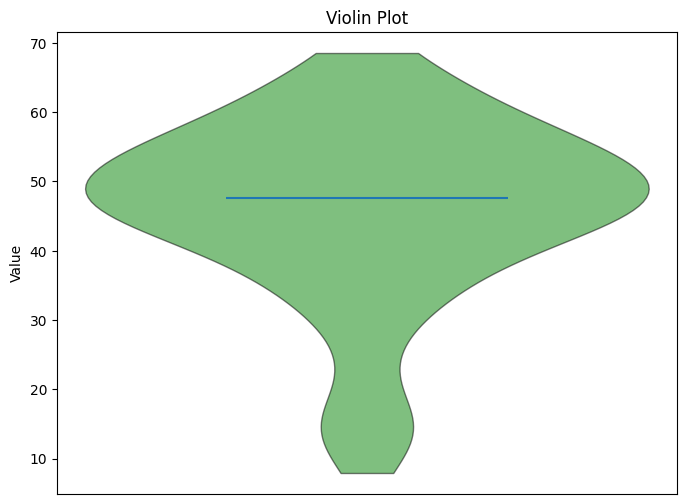

In [6]:
# Visualize data using a violin plot
fig, ax = plt.subplots(figsize=(8, 6))
v_plot = ax.violinplot(data, vert=True, showmedians=True, showextrema=False)
ax.set_ylabel('Value')
ax.set_title('Violin Plot')
ax.xaxis.set_ticks([])
# Color the violin
for pc in v_plot['bodies']:
    pc.set_facecolor('green')
    pc.set_edgecolor('black')
    pc.set_alpha(.5)

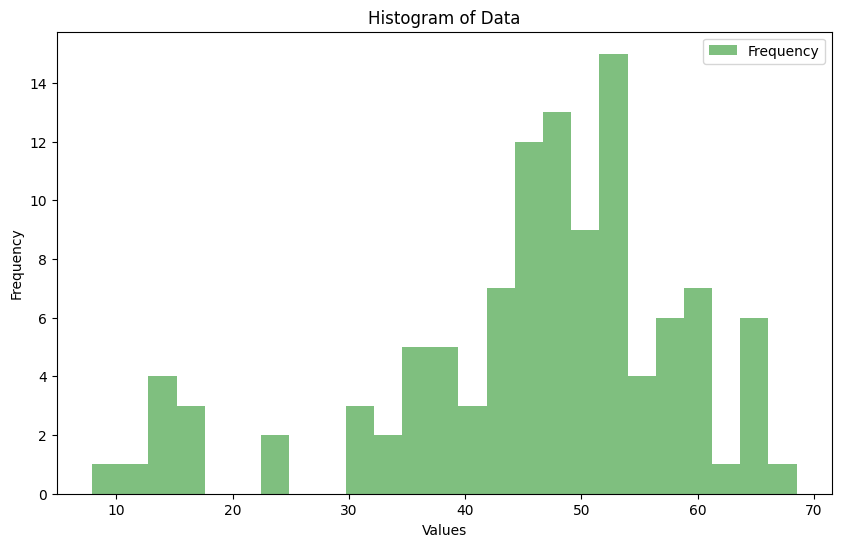

In [7]:
# Histogram display of data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data, bins=25, alpha=0.5, color="green", label='Frequency')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.legend()
plt.show()


In [ ]:
def generate_hexbin_plot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    hb = ax.hexbin(x_data, y_data, gridsize=10, cmap='YlGn')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    cb = fig.colorbar(hb)
    cb.set_label('Density')
    plt.show()

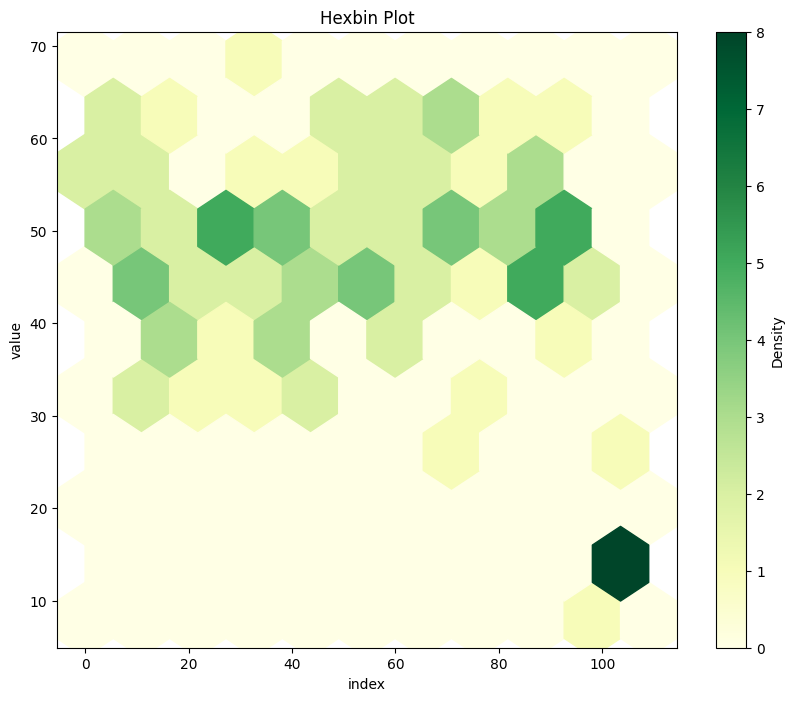

In [ ]:
generate_hexbin_plot(ranges, data, "index", "value", "Hexbin Plot")

# 2 - Statistical Methods

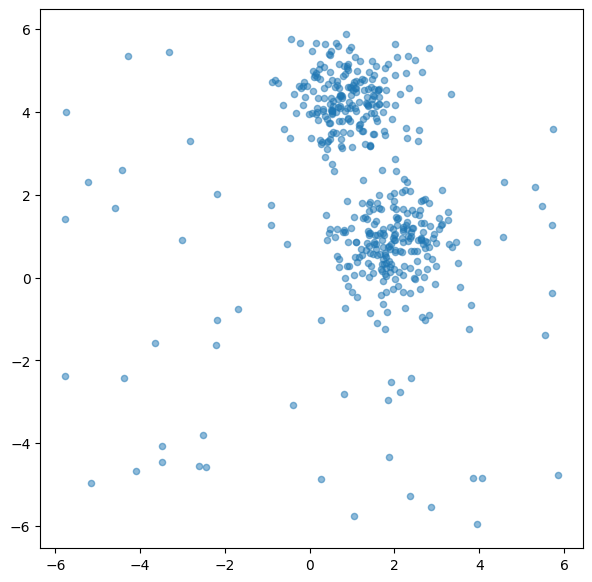

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
# Create dummy dataset
np.random.seed(0)

# Create toy data: 2 clusters and some additional random data
n_samples = 400
n_noise_samples = 70
clusters = make_blobs(n_samples=n_samples, centers=2, cluster_std=0.70, random_state=0)
random_data = np.random.uniform(low=-6, high=6, size=(n_noise_samples, 2))
X = np.vstack([clusters[0], random_data])

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5, s=20)
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

# Create the model
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.1,
    n_jobs=-1,
    random_state=42,
    verbose=0)

# Fit the model
iso_forest.fit(X)

# Classify as outlier / no outlier
outlier_classification = iso_forest.predict(X)